# Geradores

## $ \pi^*$

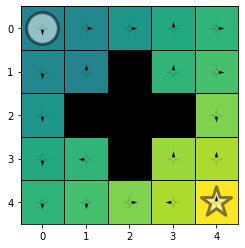

In [1]:
import numpy as np
from grid import Grid
from plot import plotPolicy, plotStateValue, plotActionStateValue, plotEffects, plotTrajectory

g = Grid()
g.pi_star(epsilon=.05)
# g.q_star()

ax = plotEffects(g)
plotPolicy(g.PI, g, ax=ax)
plotActionStateValue(g.Q, g, ax=ax)
# np.array([sum(q) for q in g.Q]).reshape(*g.size)
# g.PI
pi_star = g.PI

## $ h_1 $ 


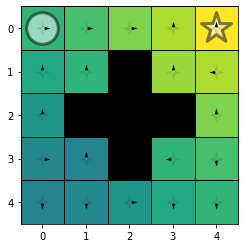

In [2]:
h1 = Grid()
target_1 = 4
h1.effects[(4,4)] = {'noise': lambda a: [-a[0], -a[1]]}
h1.effects[h1.S[target_1]] = {'terminal': True, 'reward': 10}

h1.pi_star(epsilon=.05)

ax = plotEffects(h1)
plotPolicy(h1.PI, h1, ax=ax)
plotActionStateValue(h1.Q, h1, ax=ax)

pi_1 = h1.PI

## $ h_2 $ 

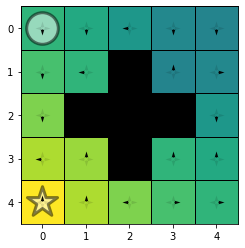

In [3]:
h2 = Grid()

target_2 = 20
h2.effects[(4,4)] = {'noise': lambda a: [-a[0], -a[1]]}
h2.effects[h2.S[target_2]] = {'terminal': True, 'reward': 10}

h2.pi_star(epsilon=.05)

ax = plotEffects(h2)
plotPolicy(h2.PI, h2, ax=ax)
plotActionStateValue(h2.Q, h2, ax=ax)

pi_2 = h2.PI

## $ \xi $

$ \eta(h|s) = \{^{.95 \;\; se \;\; s \in S^h}_{.05 \;\; se \;\; s \notin S^h} \;\; \forall h \in \mathcal{H} \; e \; \forall s \in S$ <br>
$ \pi_h(a|s) = \{^{.9625 \;\; se \;\; a = a^*}_{.0125 \;\; se \;\; a \ne a^*}  \;\; \forall a \in A \; e \; \forall s \in S$ <br>
$ \psi_h(s) = 0.3 \;\; \forall s \in S$

In [4]:
def generateTheta(S, eta=None, pis=None, psis=None):
    if eta is None:
        eta = {
            0: list(set(range(10, 25)) - {14}),
            1: list(range(10))+[14], 
        }
    if psis is None:
        psis = [[.3 for _ in g.S]]*2
    if pis is None: 
        pis = [pi_1, pi_2]
    
    H = list(zip(pis, psis))
    _eta = np.array([[.95 if s in eta[h] else .05 for h,_ in enumerate(H)] for s,_ in enumerate(S)])

    return H, _eta
    
generateTheta(g.S)

([(array([[0.0125, 0.0125, 0.9625, 0.0125],
          [0.0125, 0.0125, 0.9625, 0.0125],
          [0.0125, 0.0125, 0.9625, 0.0125],
          [0.9625, 0.0125, 0.0125, 0.0125],
          [0.9625, 0.0125, 0.0125, 0.0125],
          [0.9625, 0.0125, 0.0125, 0.0125],
          [0.9625, 0.0125, 0.0125, 0.0125],
          [0.9625, 0.0125, 0.0125, 0.0125],
          [0.9625, 0.0125, 0.0125, 0.0125],
          [0.0125, 0.0125, 0.0125, 0.9625],
          [0.9625, 0.0125, 0.0125, 0.0125],
          [0.9625, 0.0125, 0.0125, 0.0125],
          [0.9625, 0.0125, 0.0125, 0.0125],
          [0.9625, 0.0125, 0.0125, 0.0125],
          [0.9625, 0.0125, 0.0125, 0.0125],
          [0.0125, 0.0125, 0.9625, 0.0125],
          [0.9625, 0.0125, 0.0125, 0.0125],
          [0.9625, 0.0125, 0.0125, 0.0125],
          [0.0125, 0.0125, 0.0125, 0.9625],
          [0.0125, 0.9625, 0.0125, 0.0125],
          [0.0125, 0.9625, 0.0125, 0.0125],
          [0.0125, 0.9625, 0.0125, 0.0125],
          [0.0125, 0.0125, 0.962

<AxesSubplot: >

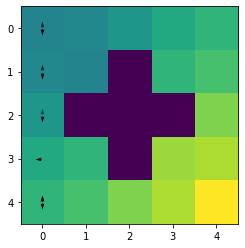

In [5]:
import random

def generateTrajetoryPi(pi, g, size=10):
    s = 0

    arr = []
    for _ in range(size-1):
        a  = random.choices(list(range(len(g.A))), pi[s], k=1)[0]
        step =  (s, a)
        s,_,_ = g.transition(s,  a)
        arr.append(step)
    arr.append((s, None))

    return arr

def generateTrajetory(H, eta, g, size=10):
    s = 0
    b = 1
    h = None
    arr = []
    for _ in range(size-1):
        if b == 1:
            h = random.choices(list(range(len(eta[s]))), eta[s], k=1)[0]
        
        pi, psi = H[h]
        
        a  = random.choices(list(range(len(pi[s]))), pi[s], k=1)[0]
        step =  (s, a)
        s,_,_ = g.transition(s,  a)
        arr.append(step)
        b = random.choices([0,1], [1-psi[s], psi[s]], k=1)[0]
    arr.append((s, None))

    return arr


tH = {1: list(range(10))+[14], 0: list(set(range(10, 25)) - {14}) }
psi_1 = [.3 for _ in g.S]
psi_2 = [.3 for _ in g.S]
H = [
    (pi_1, psi_1),
    (pi_2, psi_2)
]
eta = np.array([[.95 if s in tH[h] else .05 for h,_ in enumerate(H)] for s,_ in enumerate(g.S)])

E = generateTrajetory(H, eta, g, 15)
# E = generateTrajetoryPi(pi_star, g)

# ax = plotEffects(g)
# plotPolicy(h_2.PI, h_2, ax=ax)
ax = plotTrajectory(E, g)
plotActionStateValue(g.Q, g, ax=ax)

# Experimentação

In [6]:
from ddo import DDO 

ddo = DDO(E, H, eta)

print(ddo.posterior(0))
print(ddo.expectation_gradient())

2.8184127959342632e-05
-12.555072478327258


In [7]:
H, eta = generateTheta(g.S, psis=[[.3 for _ in g.S]]*2)
E = generateTrajetory(H, eta, g, 10)
ddo = DDO(E, H, eta)
[ddo.posterior(t) for t,_ in enumerate(E)]

[0.025448595668111598,
 0.025448595668111598,
 0.025448595668111598,
 0.025448595668111598,
 0.025448595668111598,
 0.025448595668111598,
 0.025448595668111598,
 0.025448595668111598,
 0.025448595668111598,
 0.025448595668111598]

In [8]:
H, eta = generateTheta(g.S, psis=[[.9 for _ in g.S]]*2)
E = generateTrajetory(H, eta, g, 10)

for i in range(9):
    H, eta = generateTheta(g.S, psis=[[(i+1)*1/10 for _ in g.S]]*2)
    ddo = DDO(E, H, eta)
    print((i+1)*1/10, ddo.expectation_gradient())

0.1 14.790180280047203
0.2 11.603502195284722
0.3 8.276920459165023
0.4 5.722118687350639
0.5 3.8570031837796663
0.6 2.481394811838947
0.7 1.4416606999227861
0.8 0.6354048983989191
0.9 -0.00448146998565413


In [10]:
def get_likelihood_from_theta(E, psi):
    H, eta = generateTheta(g.S, psis=psi)
    ddo = DDO(E, H, eta)
    return ddo.posterior(0)
    # return ddo.expectation_gradient()

In [11]:
p1_psi = [[.1 for _ in g.S]]*2
p2_psi = [[.9 for _ in g.S]]*2
p3_psi = [[.5 for _ in g.S]]*2
p_star_psi = [psi_1, psi_2]

psis = [p1_psi, p2_psi, p3_psi] + [p_star_psi]

likes = [get_likelihood_from_theta(E, psi) for psi in psis]
likes

p = np.argmax(likes)
print(f'Maior: {p}\n', likes)

Maior: 1
 [1.3468101269441196e-07, 0.0032998261008037673, 0.00011318186970052057, 7.727664685272952e-06]


In [12]:
def experiment(theta=.3, episodes=100, size_range=(10,50)):
    thetas = [(i+1)*1/10 for i in range(9)]
    psis = [[[theta for _ in g.S]]*2 for theta in thetas]

    params = []
    err = []
    for i in range(episodes):
        E = generateTrajetory(*generateTheta(g.S, psis=[[theta for _ in g.S]]*2), g, random.randrange(*size_range))
        likes = [get_likelihood_from_theta(E, psi) for psi in psis]
        estimative = thetas[np.argmax(likes)]
        params.append(estimative)
        err.append((estimative - theta)**2)

    estimate = round(np.mean(params),1)
    # err = [cum_err/(i+1) for i,_ in enumerate(params)]
    
    return estimate, params, err

theta = .3
estimate, params, err = experiment(theta)
estimate

0.3

Text(0.5, 0, 'episode')

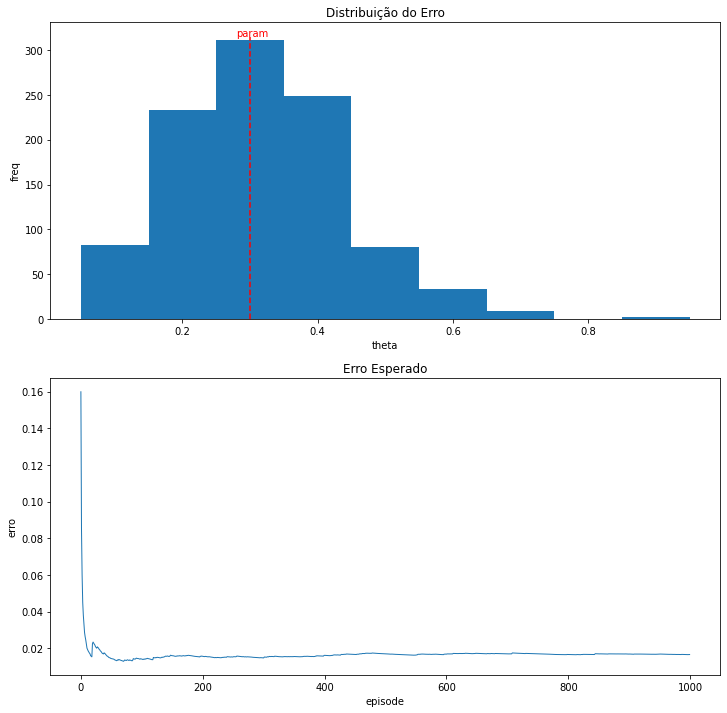

In [13]:
import matplotlib.pyplot as plt
from itertools import accumulate
from collections import Counter


theta = .3
estimate, params, err = experiment(theta, episodes=1000)

err_acum = [v/(i+1) for i,v in enumerate(list(accumulate(err)))]
freq = Counter(params)

fig, axs = plt.subplots(2,1, figsize=(12,12))

x = sorted(dict(freq))
y = [freq[i] for i in x]
m = max(freq.values())

axs[0].bar(x, y, width=.1)
axs[0].plot([theta for _ in range(m+5)], range(m+5), color='red', linestyle='dashed')
axs[0].text(theta-.02, m+4, 'param', color='red')
axs[0].set_title(f'Distribuição')
axs[0].set_ylabel('freq')
axs[0].set_xlabel('theta')

axs[0].set_title(f'Distribuição do Erro')
axs[1].set_title(f'Erro Esperado')
# axs[1].plot(range(len(err)), err, linewidth=1)#, marker='.')
axs[1].plot(range(len(err_acum)), err_acum, linewidth=1)#, marker='.')
axs[1].set_ylabel('erro')
axs[1].set_xlabel('episode')